Q1

Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

Steps to follow
importing the data set and performing basic EDA.
transformation and preprocessing (removing items that are of no use)
1 use vader_lexicon
apply sentiment intensity analyzer function to dataset
sentiment class and polarity scores to dataset
make visualization
2 WordCloud
use wordcloud and generate wordcloud for visualization
use elon musk mask for wordcloud.

In [1]:
#!pip install wordcloud
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from matplotlib.pyplot import figure
from PIL import Image

In [2]:
data = pd.read_csv('Elon_musk.csv',encoding='cp1252')

In [3]:
data = pd.read_csv("Elon_musk.csv",encoding='cp1252').drop('Unnamed: 0',axis=1)
df = data.copy()
df

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [5]:
df.Text = df.Text.astype(str)

Preprocessing

In [6]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Remove Mentions
    text = re.sub(r"#", "", text) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove The HyperLink
    text = re.sub(r"_[A-Za-z0-9]", "", text)#Removing underscores

    
    return text
# Clean The Text
df["Text"] = df["Text"].apply(cleantext)
df
# not removing stop words as these are small tweets.

,Text
0,I’m an alien
1,Aarmack Ray tracing on Cyberpunk with HDR is n...
2,Great interview!
3,Doge is underestimated
4,Congratulations Tesla China for amazing execu...
...,...
1994,"True, it sounds so surreal, but the negative ..."
1995,Make sure to read ur terms &amp; conditions b...
1996,Samwise Gamgee
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...


Sentiment values

In [7]:
sent = SentimentIntensityAnalyzer()

In [8]:
sent.polarity_scores(df.Text.iloc[2])

{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.6588}

In [9]:
#Function to retrieve sentiment class
def get_senti_class(review): 
    analysis = sent.polarity_scores(review)
    # set sentiment 
    if analysis['compound'] > 0: 
        return 'positive'
    elif analysis['compound']< 0: 
        return 'negative'
    else: 
        return 'neutral'
    
def get_sentiment(review):
    return pd.Series([sent.polarity_scores(review),get_senti_class(review)])

In [10]:
#Applying function to all tweets
df[["Scores", "Sentiment"]] = df.Text.apply(get_sentiment)
df

,Text,Scores,Sentiment
0,I’m an alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1,Aarmack Ray tracing on Cyberpunk with HDR is n...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,Great interview!,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",positive
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
4,Congratulations Tesla China for amazing execu...,"{'neg': 0.0, 'neu': 0.628, 'pos': 0.372, 'comp...",positive
...,...,...,...
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative
1995,Make sure to read ur terms &amp; conditions b...,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",positive
1996,Samwise Gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
1997,Altho Dumb and Dumber is <U+0001F525><U+0001F...,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...",negative


In [11]:
comp_value = [d.get('compound') for d in df.Scores]

In [12]:
df.Sentiment.value_counts() # very less negative comments

neutral     888
positive    880
negative    231
Name: Sentiment, dtype: int64

C:\Users\amanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

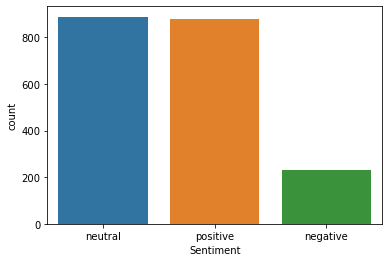

In [13]:
sns.countplot(df.Sentiment)

In [14]:
df.loc[df.Sentiment=='negative'] # all the tweets with negative

,Text,Scores,Sentiment
3,Doge is underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",negative
6,"Frodo was the underdoge,\nAll thought he would...","{'neg': 0.226, 'neu': 0.774, 'pos': 0.0, 'comp...",negative
15,"He definitely has issues, but the sentencing ...","{'neg': 0.162, 'neu': 0.681, 'pos': 0.157, 'co...",negative
20,Any crypto wallet that won’t give you your pr...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",negative
21,Your app sucks,"{'neg': 0.556, 'neu': 0.444, 'pos': 0.0, 'comp...",negative
...,...,...,...
1965,That is the near-term danger of AI,"{'neg': 0.362, 'neu': 0.638, 'pos': 0.0, 'comp...",negative
1975,Death is the loss of information,"{'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...",negative
1991,"No easy way to answer this in a tweet, but he...","{'neg': 0.205, 'neu': 0.622, 'pos': 0.174, 'co...",negative
1994,"True, it sounds so surreal, but the negative ...","{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",negative


Wordcloud

In [15]:
tweet_stri = ' '.join(df['Text'].tolist()) #Since tweets are filled with little words, we cant remove stopwords

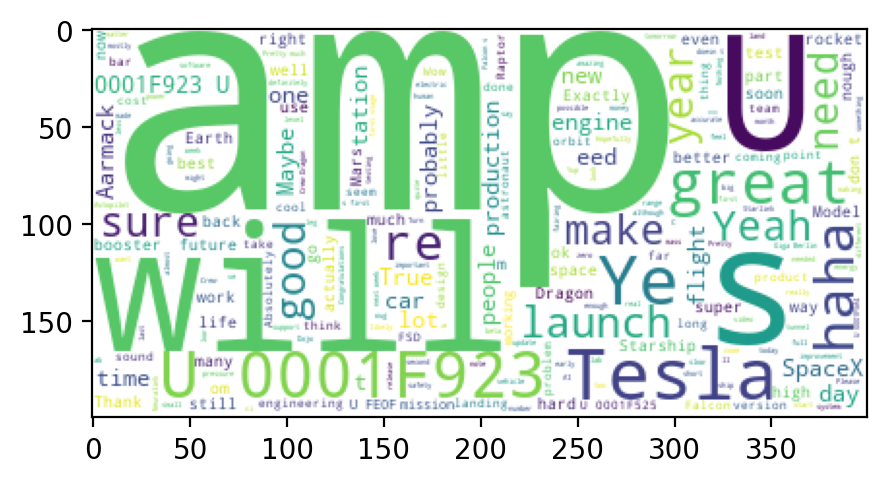

In [16]:
#WordCloud
wordcloud1 = WordCloud(
                      background_color='white', max_words=500,
               stopwords=STOPWORDS, max_font_size=200,
               random_state=42).generate(tweet_stri)
figure(figsize=(5,4), dpi=200)
plt.imshow(wordcloud1)

In [17]:
# creating a elon musk mask
maskarray = np.array(Image.open('pngegg.png'))

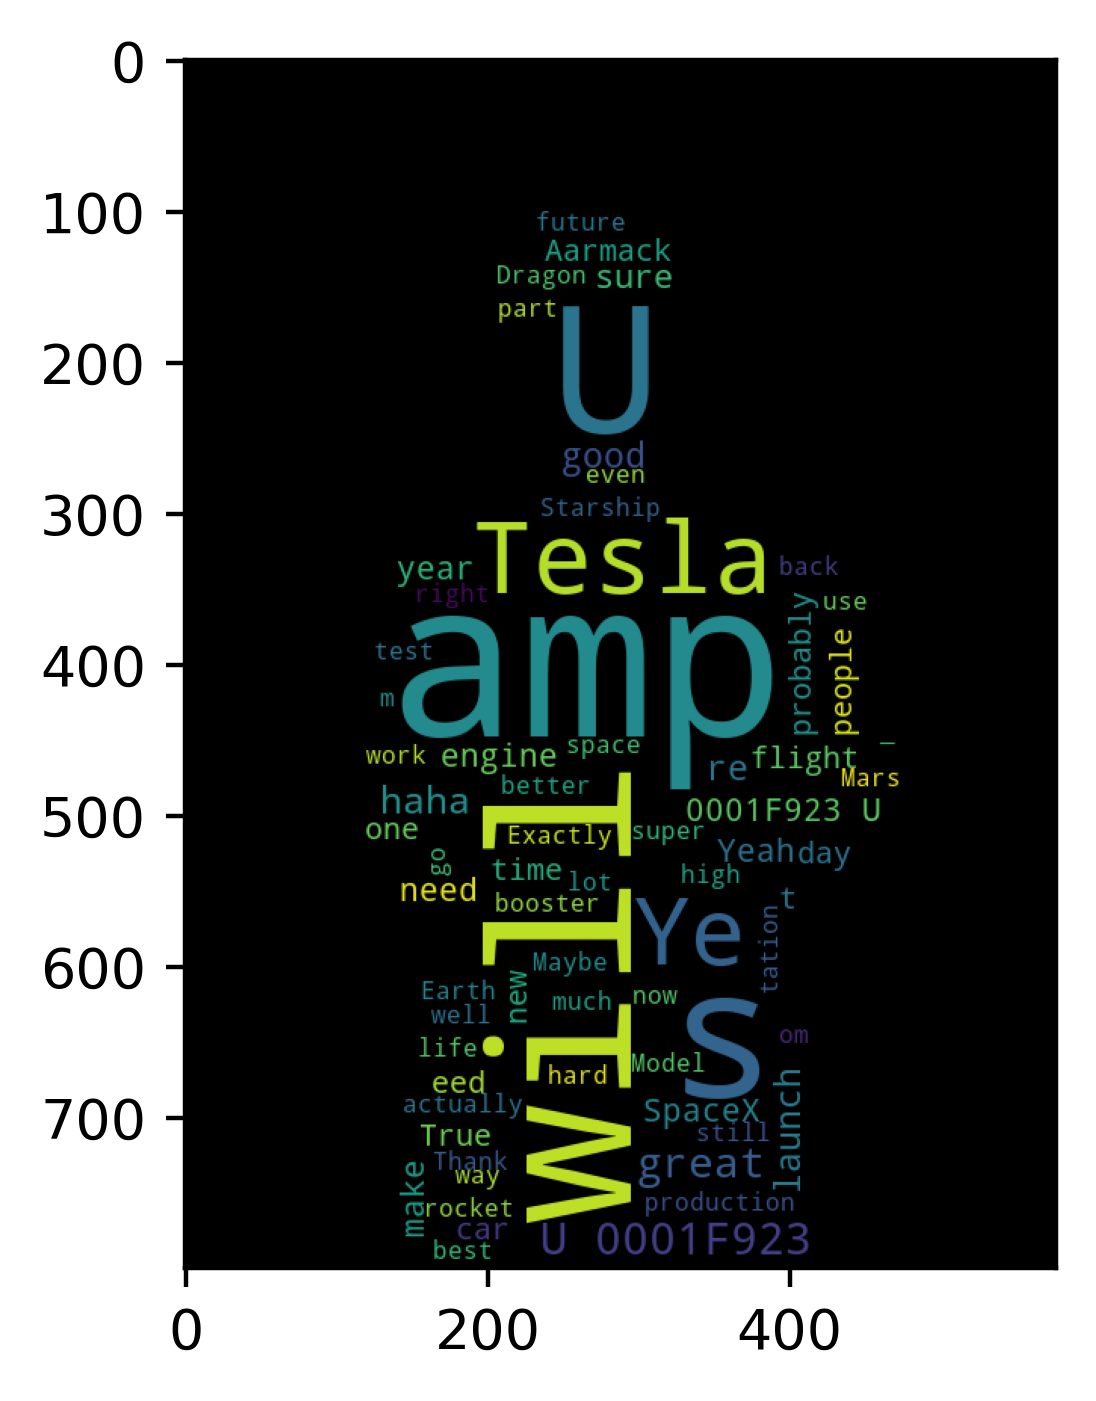

In [18]:
elon_musk = WordCloud(background_color='black',
                      max_words = 70, 
                    stopwords = set(STOPWORDS),
                    mask = maskarray
                    ).generate(tweet_stri)
figure(figsize=(5,4), dpi=400)
plt.imshow(elon_musk)

Q2

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

amazon reviews
https://www.amazon.com/CORSAIR-Vengeance-3200MHz-Desktop-Memory/dp/B07D1XCKWW?th=1

In [ ]:
##from amazon_product_review_scraper import amazon_product_review_scraper #this library have errors.
##from bs4 import BeautifulSoup
##import requests
##import scrapy
#scrapy and beautifulsoup can only extract limited reviews so using a free resource 'webautomation.io' to extract sufficient reviews

In [23]:
data1 = pd.read_csv('review_data.csv').drop('Unnamed: 0',axis=1)
data1.head()

,rating,reviewer_name,review_title,review_rating,review_date,review_location,review_content
0,4.9,bArToS,Just incase it helps someone,5,"January 5, 2019",the United States,So I got these for my build and had a little p...
1,4.9,Jeffrey,They take up less space,5,"January 28, 2021",the United States,"Great RAM, I have a previous version of this r..."
2,4.9,David,Great RAM,5,"May 31, 2020",the United States,Works great. Got the 2x32gb. Read review think...
3,4.9,A. Aurelius,The RGB LEDs may cause unusual errors with iCUE,4,"May 6, 2020",the United States,The last item I had with several blinking ligh...
4,4.9,Dennis L.,B-Grade product from Amazon?,1,"January 17, 2020",the United States,I bought two packs of the 2x8 GB Corsair RGB 3...


In [26]:
df = data1.copy()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rating           500 non-null    float64
 1   reviewer_name    500 non-null    object 
 2   review_title     500 non-null    object 
 3   review_rating    500 non-null    int64  
 4   review_date      500 non-null    object 
 5   review_location  500 non-null    object 
 6   review_content   500 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.5+ KB


,rating,review_rating
count,5.000000e+02,500.000000
mean,4.900000e+00,4.326000
std,4.623153e-14,1.284923
min,4.900000e+00,1.000000
25%,4.900000e+00,4.000000
50%,4.900000e+00,5.000000
75%,4.900000e+00,5.000000
max,4.900000e+00,5.000000


In [34]:
#data preprocessing
#Cleaning review_location
df.review_location = df.review_location.apply(lambda x : x.replace('the',''))
df.head()

,rating,reviewer_name,review_title,review_rating,review_date,review_location,review_content
0,4.9,bArToS,Just incase it helps someone,5,"January 5, 2019",United States,So I got these for my build and had a little p...
1,4.9,Jeffrey,They take up less space,5,"January 28, 2021",United States,"Great RAM, I have a previous version of this r..."
2,4.9,David,Great RAM,5,"May 31, 2020",United States,Works great. Got the 2x32gb. Read review think...
3,4.9,A. Aurelius,The RGB LEDs may cause unusual errors with iCUE,4,"May 6, 2020",United States,The last item I had with several blinking ligh...
4,4.9,Dennis L.,B-Grade product from Amazon?,1,"January 17, 2020",United States,I bought two packs of the 2x8 GB Corsair RGB 3...


In [36]:
#Cleaning review_date 
df.review_date = df.review_date.apply(lambda x : x.replace(',',''))
df.head()

,rating,reviewer_name,review_title,review_rating,review_date,review_location,review_content
0,4.9,bArToS,Just incase it helps someone,5,January 5 2019,United States,So I got these for my build and had a little p...
1,4.9,Jeffrey,They take up less space,5,January 28 2021,United States,"Great RAM, I have a previous version of this r..."
2,4.9,David,Great RAM,5,May 31 2020,United States,Works great. Got the 2x32gb. Read review think...
3,4.9,A. Aurelius,The RGB LEDs may cause unusual errors with iCUE,4,May 6 2020,United States,The last item I had with several blinking ligh...
4,4.9,Dennis L.,B-Grade product from Amazon?,1,January 17 2020,United States,I bought two packs of the 2x8 GB Corsair RGB 3...


In [38]:
# fixing the date format
from datetime import datetime
replace = {'March':'Mar','April':'Apr','May':'May','June':'Jun','July':'Jul','August':'Aug','September':'Sep',
          'October':'Oct','November':'Nov','December':'Dec','January':'Jan','February':'Feb'}
df.review_date = df.review_date.replace(replace, regex=True)
df.review_date = df.review_date.apply(lambda x : datetime.strptime(x, '%b %d %Y'))                                                                                        

In [40]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rating           500 non-null    float64       
 1   reviewer_name    500 non-null    object        
 2   review_title     500 non-null    object        
 3   review_rating    500 non-null    int64         
 4   review_date      500 non-null    datetime64[ns]
 5   review_location  500 non-null    object        
 6   review_content   500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [42]:
#creating a new data set and deleting names and content.
df1 = df.copy()
df1 = df1.drop(['reviewer_name','review_content','rating'],axis=1)
df1.head()

,review_title,review_rating,review_date,review_location
0,Just incase it helps someone,5,2019-01-05,United States
1,They take up less space,5,2021-01-28,United States
2,Great RAM,5,2020-05-31,United States
3,The RGB LEDs may cause unusual errors with iCUE,4,2020-05-06,United States
4,B-Grade product from Amazon?,1,2020-01-17,United States


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rating           500 non-null    float64       
 1   reviewer_name    500 non-null    object        
 2   review_title     500 non-null    object        
 3   review_rating    500 non-null    int64         
 4   review_date      500 non-null    datetime64[ns]
 5   review_location  500 non-null    object        
 6   review_content   500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [44]:
#removing Stopwords
df1.review_title = df1.review_title.apply(lambda x: ' '.join([word for word in x.split() if word not in (STOPWORDS)]))
df1.head() #No need to perform stemming or lematization as titles are almost small and short

,review_title,review_rating,review_date,review_location
0,Just incase helps someone,5,2019-01-05,United States
1,They take less space,5,2021-01-28,United States
2,Great RAM,5,2020-05-31,United States
3,The RGB LEDs may cause unusual errors iCUE,4,2020-05-06,United States
4,B-Grade product Amazon?,1,2020-01-17,United States


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   rating           500 non-null    float64       
 1   reviewer_name    500 non-null    object        
 2   review_title     500 non-null    object        
 3   review_rating    500 non-null    int64         
 4   review_date      500 non-null    datetime64[ns]
 5   review_location  500 non-null    object        
 6   review_content   500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [47]:
sentanalyzer = SentimentIntensityAnalyzer()

In [48]:
sentanalyzer.polarity_scores(df.review_title.iloc[2])

{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'compound': 0.6249}

In [49]:
# defining function to retreive sentiment class
def get_sentiment_class(review): 
    analysis = sentanalyzer.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'
    
def get_sentiment(review):
    return pd.Series([sentanalyzer.polarity_scores(review),get_sentiment_class(review)])

In [50]:
#Applying function to all comments
df1[['Scores', 'Sentiment']] = df1.review_title.apply(get_sentiment)
df1

,review_title,review_rating,review_date,review_location,Scores,Sentiment
0,Just incase helps someone,5,2019-01-05,United States,"{'neg': 0.0, 'neu': 0.536, 'pos': 0.464, 'comp...",positive
1,They take less space,5,2021-01-28,United States,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",neutral
2,Great RAM,5,2020-05-31,United States,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",positive
3,The RGB LEDs may cause unusual errors iCUE,4,2020-05-06,United States,"{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'comp...",negative
4,B-Grade product Amazon?,1,2020-01-17,United States,"{'neg': 0.0, 'neu': 0.541, 'pos': 0.459, 'comp...",positive
...,...,...,...,...,...,...
495,"Awesome looking RGB, simply stunning",4,2018-10-08,United States,"{'neg': 0.0, 'neu': 0.309, 'pos': 0.691, 'comp...",positive
496,RGB Problem,3,2021-08-21,United States,"{'neg': 0.73, 'neu': 0.27, 'pos': 0.0, 'compou...",negative
497,Very Fast!! Good quality!!,5,2019-12-27,United States,"{'neg': 0.0, 'neu': 0.408, 'pos': 0.592, 'comp...",positive
498,Awesome RGB,5,2021-12-19,United States,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",positive


In [51]:
# performing emotion mining
df1.Sentiment.value_counts()

positive    309
neutral     140
negative     51
Name: Sentiment, dtype: int64

C:\Users\amanu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

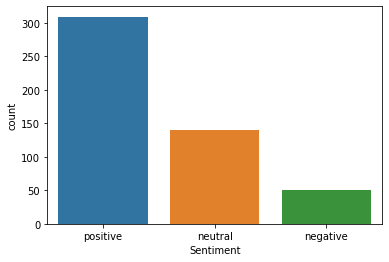

In [52]:
sns.countplot(df1.Sentiment)

In [54]:
df1.loc[df1.Sentiment=='negative'].review_rating.value_counts() 
# negative reviews for more than 3 stars

1    24
5     8
3     8
2     6
4     5
Name: review_rating, dtype: int64

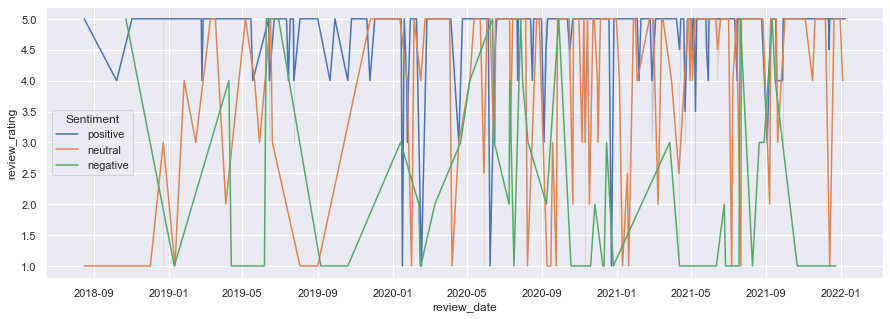

In [62]:
sns.set(rc={'figure.figsize':(15,5)})
sns.lineplot(x=df1.review_date,y=df1.review_rating,data=df1,hue=df1.Sentiment)
plt.show()

<AxesSubplot:xlabel='review_date'>

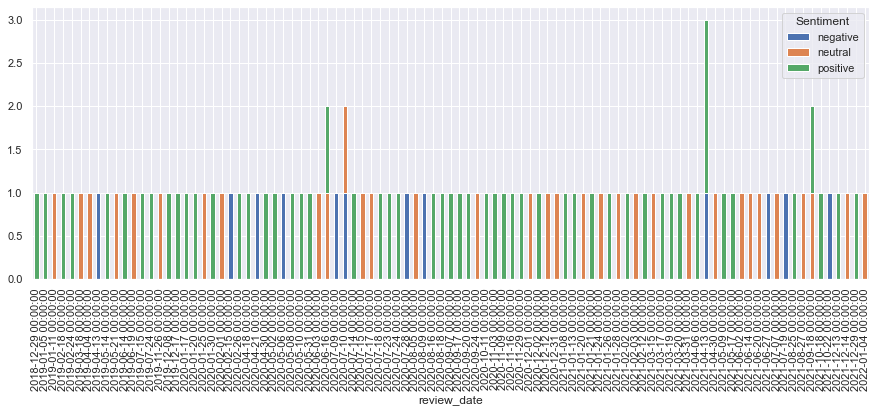

In [68]:
df1.review_date = pd.to_datetime(df1.review_date)
pd.crosstab(df1.review_date.iloc[:100],df1.Sentiment).plot.bar(stacked=True)

In [73]:
# using wordcloud
review = ' '.join(df1['review_title'].tolist()) 

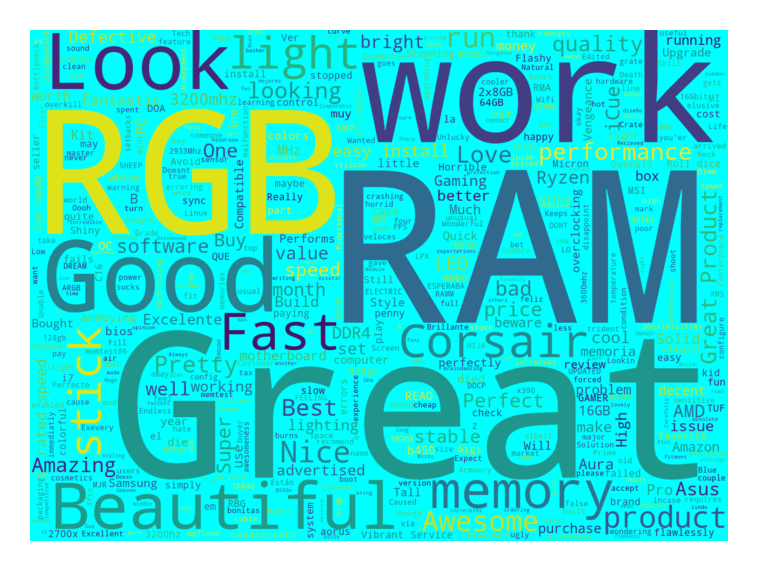

In [74]:
#Creating Wordcloud
wordcloud_ip = WordCloud(
                      background_color="cyan", max_words=500,
               width=1500, height=1100).generate(review)
figure(figsize=(3,4), dpi=300)
plt.imshow(wordcloud_ip,interpolation="bilinear")
plt.axis("off")
plt.show()

In [75]:
# Choose path for +ve words provided in question
with open("positive-words.txt","r") as pos:
  positivewords = pos.read().split("\n")
  

# Choose path for -ve words provided in question
with open("negative-words.txt","r") as neg:
  negitivewords = neg.read().split("\n")

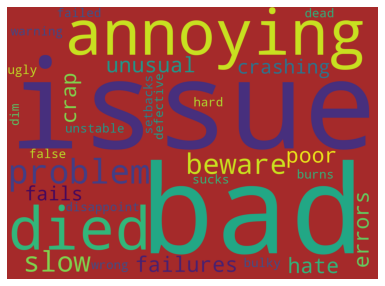

In [76]:
# creating a negative wordcloud using negitivewords
negitive = " ".join ([w for w in review_str.split() if w in negitivewords])
negwordcloud = WordCloud(
                     background_color='brown',
                     width=1500,
                     height=1100
                    ).generate(negitive)

plt.imshow(negwordcloud)
plt.axis("off")

plt.show()

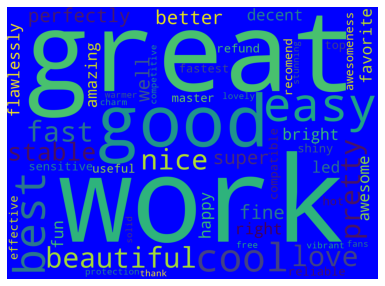

In [78]:
# Positive wordcloud using positivewords
positive = " ".join ([w for w in review.split() if w in positivewords])
poswordcloud = WordCloud(
                     background_color='blue',  width=1500,
                      height=1100
                     ).generate(positive)
plt.imshow(poswordcloud)
plt.axis("off")
plt.show()

Conclusion:
Perfomed Sentiment Analysis for choosen amazon product using lex and created worldclouds using positive and negative words.